Импортируем pandas

In [401]:
import pandas as pd
import matplotlib.pyplot as plt

Импортируем данные о стоимости машин

In [402]:
car_price = pd.read_csv('https://raw.githubusercontent.com/rmadan16/LinearRegression_CarPrice/refs/heads/master/CarPrice_Assignment.csv')

Посмотрим, какие столбцы присутствуют в таблице с данными

In [403]:
car_price.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Определим признаки (X) и зависимые переменные (y)

Попробуем для начала взять один численный и один категориальный признак, например, количество лошадиных сил и тип кузова

In [404]:
y = car_price['price']
X = car_price[['carbody', 'horsepower']]
X

,carbody,horsepower
0,convertible,111
1,convertible,111
2,hatchback,154
3,sedan,102
4,sedan,115
...,...,...
200,sedan,114
201,sedan,160
202,sedan,134
203,sedan,106


Теперь нужно преобразовать категориальный признак. Импользуем One-Hot Encoding, так как категории не имеют определённого порядка

In [405]:
from sklearn.preprocessing import OneHotEncoder

In [406]:
encoder = OneHotEncoder()

In [407]:
encoded_features = encoder.fit_transform(X[['carbody']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['carbody']))
X = pd.concat([X, encoded_df], axis=1).drop('carbody', axis=1)
X

,horsepower,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,111,1.0,0.0,0.0,0.0,0.0
1,111,1.0,0.0,0.0,0.0,0.0
2,154,0.0,0.0,1.0,0.0,0.0
3,102,0.0,0.0,0.0,1.0,0.0
4,115,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
200,114,0.0,0.0,0.0,1.0,0.0
201,160,0.0,0.0,0.0,1.0,0.0
202,134,0.0,0.0,0.0,1.0,0.0
203,106,0.0,0.0,0.0,1.0,0.0


Теперь нужно разделить данные на обучающую и тестовую выборки

In [408]:
from sklearn.model_selection import train_test_split
initital = 21
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=initital)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143, 6), (62, 6), (143,), (62,))

Далее используем модель линейной регрессии

In [409]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Обучение модели

In [410]:
model.fit(X_train, y_train)

LinearRegression()

Свободный член

In [411]:
model.intercept_

np.float64(-2320.337286063732)

Коэффициенты (веса)

In [412]:
model.feature_names_in_

array(['horsepower', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon'],
      dtype=object)

In [413]:
model.coef_

array([  167.60212054,  2143.22474827,  3449.96083454, -3971.16706924,
        -578.65611542, -1043.36239814])

Попытка предсказаний на тестовой выборке

In [414]:
y_pred = model.predict(X_test)

Импортируем метрики, чтобы узнать, что в итоге получилось

In [415]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [416]:
mean_absolute_error(y_test, y_pred)

3232.7207820177714

In [417]:
mean_absolute_percentage_error(y_test, y_pred)

0.2615057143981352

In [418]:
mean_squared_error(y_test, y_pred)

19621208.947314292

Получили ошибку в 26%, что довольно много. Попробуем добавить признаков и обучить снова

Добавим информацию о размерах автомобиля и типе топлива

In [419]:
X = pd.concat([X, car_price[['carlength', 'carwidth', 'carheight']]], axis=1)
encoded_features = encoder.fit_transform(car_price[['fueltype']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['fueltype']))
X = pd.concat([X, encoded_df], axis=1)
X

,horsepower,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,carlength,carwidth,carheight,fueltype_diesel,fueltype_gas
0,111,1.0,0.0,0.0,0.0,0.0,168.8,64.1,48.8,0.0,1.0
1,111,1.0,0.0,0.0,0.0,0.0,168.8,64.1,48.8,0.0,1.0
2,154,0.0,0.0,1.0,0.0,0.0,171.2,65.5,52.4,0.0,1.0
3,102,0.0,0.0,0.0,1.0,0.0,176.6,66.2,54.3,0.0,1.0
4,115,0.0,0.0,0.0,1.0,0.0,176.6,66.4,54.3,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
200,114,0.0,0.0,0.0,1.0,0.0,188.8,68.9,55.5,0.0,1.0
201,160,0.0,0.0,0.0,1.0,0.0,188.8,68.8,55.5,0.0,1.0
202,134,0.0,0.0,0.0,1.0,0.0,188.8,68.9,55.5,0.0,1.0
203,106,0.0,0.0,0.0,1.0,0.0,188.8,68.9,55.5,1.0,0.0


Повторное раздление данных

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=initital)

Повторное обучение

In [421]:
model.fit(X_train, y_train)

LinearRegression()

In [422]:
model.intercept_

np.float64(-101689.48130035019)

In [423]:
coef_df = pd.DataFrame({
    'feature': model.feature_names_in_,
    'coef': model.coef_
})
coef_df

,feature,coef
0,horsepower,125.659574
1,carbody_convertible,4476.409655
2,carbody_hardtop,2789.765472
3,carbody_hatchback,-2684.958969
4,carbody_sedan,-1269.827230
5,carbody_wagon,-3311.388928
6,carlength,-17.788927
7,carwidth,1408.002218
8,carheight,279.481767
9,fueltype_diesel,1126.826728


In [424]:
y_pred = model.predict(X_test)

In [425]:
mean_absolute_error(y_test, y_pred)

3033.022763227723

In [426]:
mean_absolute_percentage_error(y_test, y_pred)

0.25316199382483495

In [427]:
mean_squared_error(y_test, y_pred)

14738018.803218946

Ошибка немного уменьшилась и также видно, что нектороые данные имеют заметно меньшее влияние, чем другие. Например, лошадиные силы, длина и высота машины. Попробуем избавиться от них

In [428]:
X = X.drop(['horsepower', 'carlength', 'carheight'], axis=1)

Обучим ещё раз, посмотрим, как это влияет на точность предсказаний

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=initital)
model.fit(X_train, y_train)
coef_df = pd.DataFrame({
    'feature': model.feature_names_in_,
    'coef': model.coef_
})
coef_df

,feature,coef
0,carbody_convertible,6611.695063
1,carbody_hardtop,4621.707659
2,carbody_hatchback,-3974.596566
3,carbody_sedan,-1939.058884
4,carbody_wagon,-5319.747272
5,carwidth,2928.268460
6,fueltype_diesel,-1210.260480
7,fueltype_gas,1210.260480


In [430]:
y_pred = model.predict(X_test)

In [431]:
mean_absolute_error(y_test, y_pred)

3357.156933945885

In [432]:
mean_absolute_percentage_error(y_test, y_pred)

0.2854808446003196

In [433]:
mean_squared_error(y_test, y_pred)

22094941.73406909

После избавления от незначимых данных ошибка незначительно выросла. Попробуем найти что-то более значимое. Попробуем использовать сразу все данные (кроме названия) и посмотрим на коэффициенты.

In [434]:
X = car_price[['wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

In [435]:
encoded_features = encoder.fit_transform(car_price[['fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
X = pd.concat([X, encoded_df], axis=1)
X

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,...,enginesize_308,enginesize_326,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114,5400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160,5300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.8,134,5500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,106,4800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [436]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=initital)
model.fit(X_train, y_train)

CPU times: user 24.9 ms, sys: 1.43 ms, total: 26.3 ms
Wall time: 12.9 ms


LinearRegression()

In [437]:
model.intercept_

np.float64(-41242.932218064016)

In [438]:
coef_df = pd.DataFrame({
    'feature': model.feature_names_in_,
    'coef': model.coef_
})
for index, row in coef_df.iterrows():
    print(f"{row['feature']}: {row['coef']}")

wheelbase: -2.423392697910863
carlength: -103.97570706617924
carwidth: 691.2051885330083
carheight: -193.6883231132314
curbweight: 14.254508625969606
boreratio: 718.0431009480349
stroke: -2501.21742530932
compressionratio: 1436.332546671241
horsepower: -7.159938691072739
peakrpm: -0.7180447220539463
citympg: -37.68474380562043
highwaympg: 24.730282240608176
fueltype_diesel: -6951.559501242762
fueltype_gas: 6951.559501243209
aspiration_std: -1303.9020877874466
aspiration_turbo: 1303.9020877898697
doornumber_four: -148.78623070297738
doornumber_two: 148.78623070330286
carbody_convertible: 1705.1966449272009
carbody_hardtop: -371.4687265720195
carbody_hatchback: -341.57749628544116
carbody_sedan: 212.2231810280573
carbody_wagon: -1204.3736030963937
drivewheel_4wd: -151.99211530144476
drivewheel_fwd: -2.7069203750370434
drivewheel_rwd: 154.6990356770193
enginelocation_front: -7460.987495597474
enginelocation_rear: 7460.987495597511
enginetype_dohc: 5229.9045195038225
enginetype_dohcv: 1.45

In [439]:
y_pred = model.predict(X_test)

In [440]:
mean_absolute_error(y_test, y_pred)

1657.941296756953

In [441]:
mean_absolute_percentage_error(y_test, y_pred)

0.1509055622369788

In [442]:
mean_squared_error(y_test, y_pred)

5756394.816303857

Получена на данный момент наибольшая точность, но используется слишком много данных. Попробуем снизить количество признаков.

In [443]:
mean_coef = coef_df['coef'].abs().mean()
mean_coef

np.float64(2492.8021948543087)

In [444]:
filtered_coef = coef_df[coef_df['coef'].abs() >= mean_coef]
filtered_coef

,feature,coef
6,stroke,-2501.217425
12,fueltype_diesel,-6951.559501
13,fueltype_gas,6951.559501
26,enginelocation_front,-7460.987496
27,enginelocation_rear,7460.987496
28,enginetype_dohc,5229.904520
30,enginetype_l,-4370.284226
31,enginetype_ohc,4026.824105
32,enginetype_ohcf,-4954.058048
35,cylindernumber_eight,6463.711826


In [445]:
X = X[filtered_coef['feature']]
X

,stroke,fueltype_diesel,fueltype_gas,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,cylindernumber_eight,...,enginesize_171,enginesize_181,enginesize_194,enginesize_209,enginesize_234,enginesize_304,enginesize_308,enginesize_326,fuelsystem_1bbl,fuelsystem_idi
0,2.68,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.68,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.47,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,3.15,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,3.15,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,2.87,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,3.40,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Из набора признаков были удалены все те, чьи веса по модулю меньше среднего значения. Это сократило число признаков почти в три раза. Посмотрим, как это повлияет на модель

In [446]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=initital)
model.fit(X_train, y_train)

CPU times: user 9.68 ms, sys: 0 ns, total: 9.68 ms
Wall time: 7.89 ms


LinearRegression()

In [447]:
model.intercept_

np.float64(11006.284556132134)

In [448]:
coef_df = pd.DataFrame({
    'feature': model.feature_names_in_,
    'coef': model.coef_
})
coef_df

,feature,coef
0,stroke,2314.171015
1,fueltype_diesel,1015.351377
2,fueltype_gas,-1015.351377
3,enginelocation_front,-4503.559832
4,enginelocation_rear,4503.559832
5,enginetype_dohc,18762.533521
6,enginetype_l,22623.136871
7,enginetype_ohc,16033.655279
8,enginetype_ohcf,9068.851213
9,cylindernumber_eight,20459.751004


In [449]:
y_pred = model.predict(X_test)

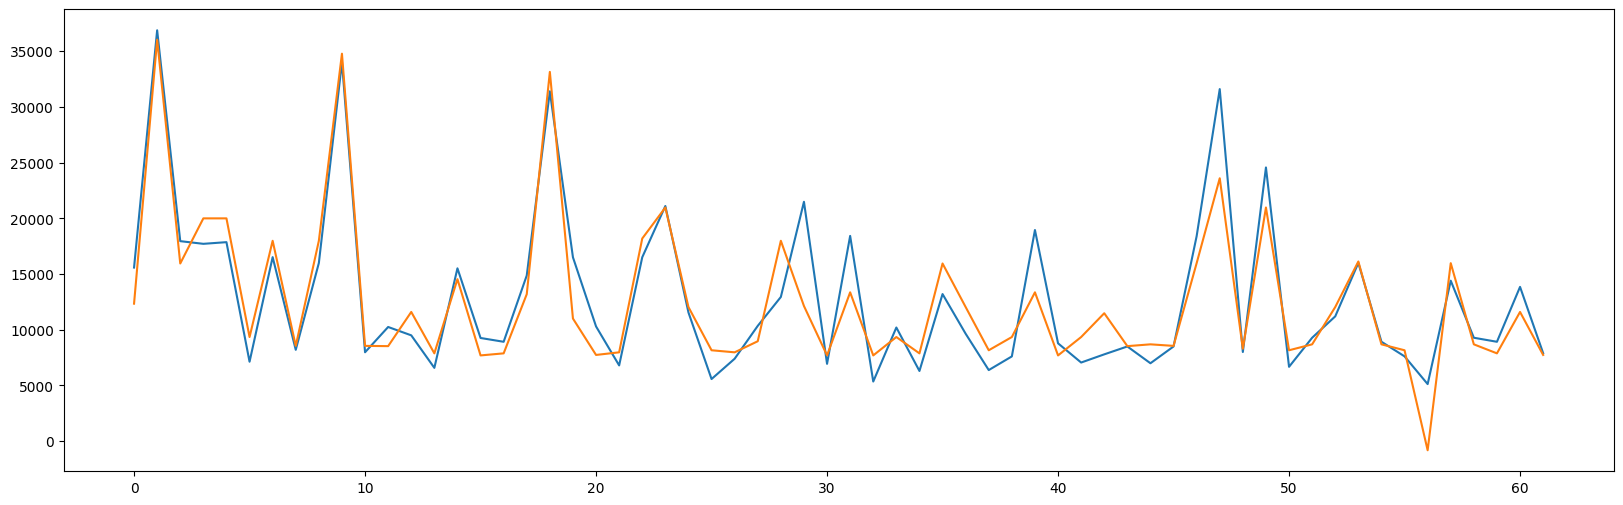

In [450]:
plt.figure(figsize=(20, 6))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_pred)), y_pred)
plt.show()

In [451]:
mean_absolute_error(y_test, y_pred)

1997.836825009927

In [452]:
mean_absolute_percentage_error(y_test, y_pred)

0.17778911493149224

In [453]:
mean_squared_error(y_test, y_pred)

7405383.75309055

Удалось значительно оптимизировать модель при незначительной потере в точности. Точность всё ещё далека от идеала. Возможно, требуется увеличение размера выборки или использование другой модели.